In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Flight_Booking.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df = df.drop(columns = ["Unnamed: 0"])

In [7]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [8]:
df.shape

(300153, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [10]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


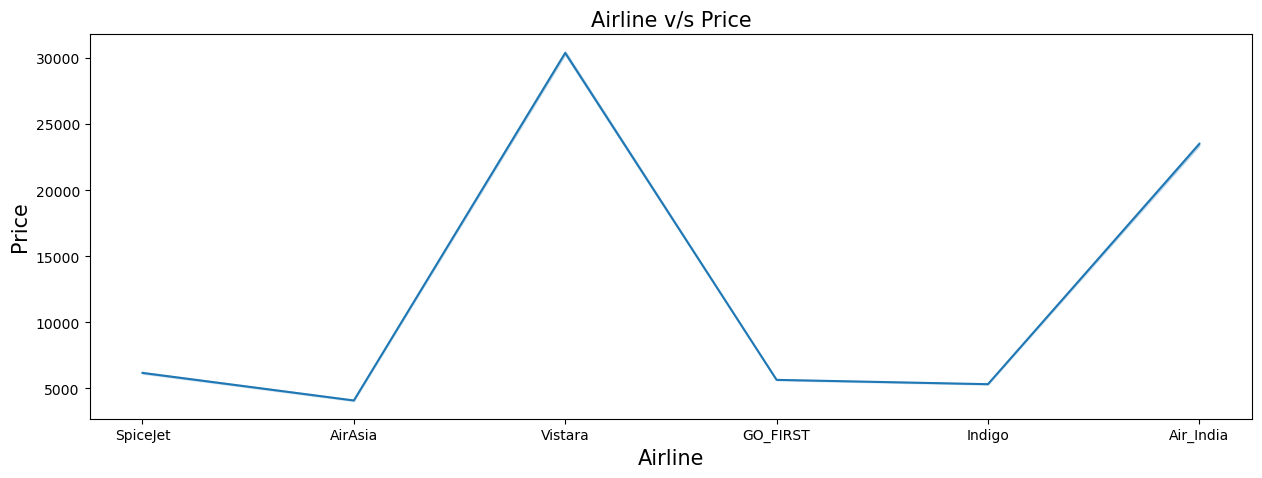

In [11]:
# Data Visualization

plt.figure(figsize = (15,5))
sns.lineplot(x = df['airline'], y =df['price'])
plt.title("Airline v/s Price", fontsize = 15)
plt.xlabel("Airline", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.show()

### There is a variation in price with different airlines.

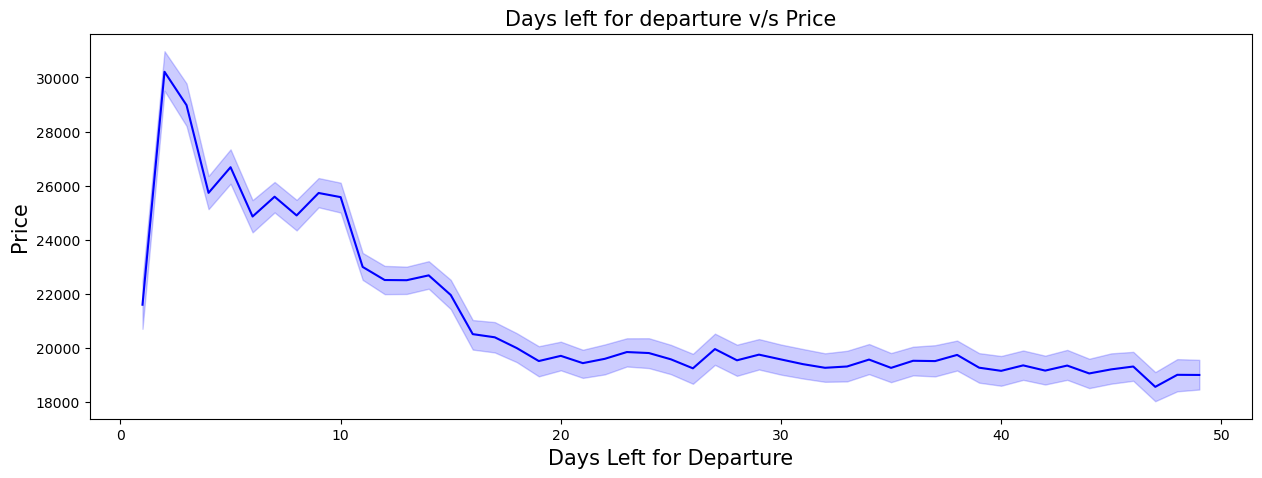

In [12]:
plt.figure(figsize = (15,5))
sns.lineplot(data = df, x = 'days_left', y = 'price', color = 'blue')
plt.xlabel('Days Left for Departure', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title("Days left for departure v/s Price", fontsize=15)
plt.show()

### The price of he ticket increases as the days left for departure decreases.

Text(0.5, 1.0, 'Price range of all the flights')

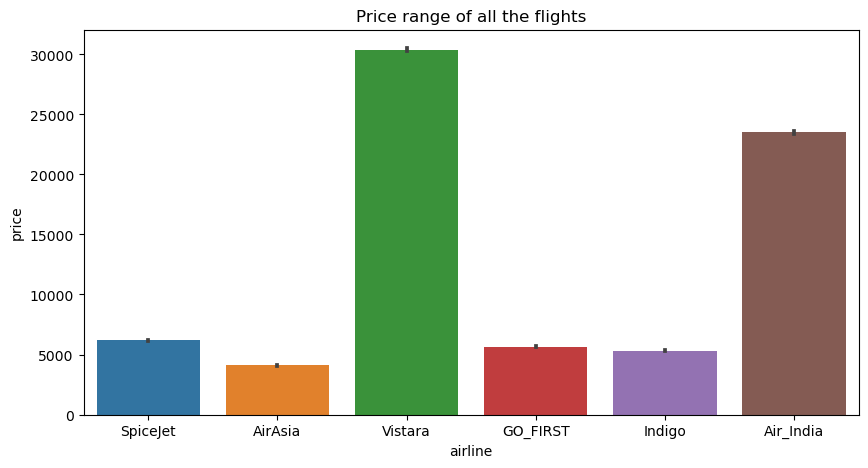

In [13]:
plt.figure(figsize = (10, 5))
sns.barplot(x='airline', y='price', data = df)
plt.title("Price range of all the flights")

<Axes: xlabel='class', ylabel='price'>

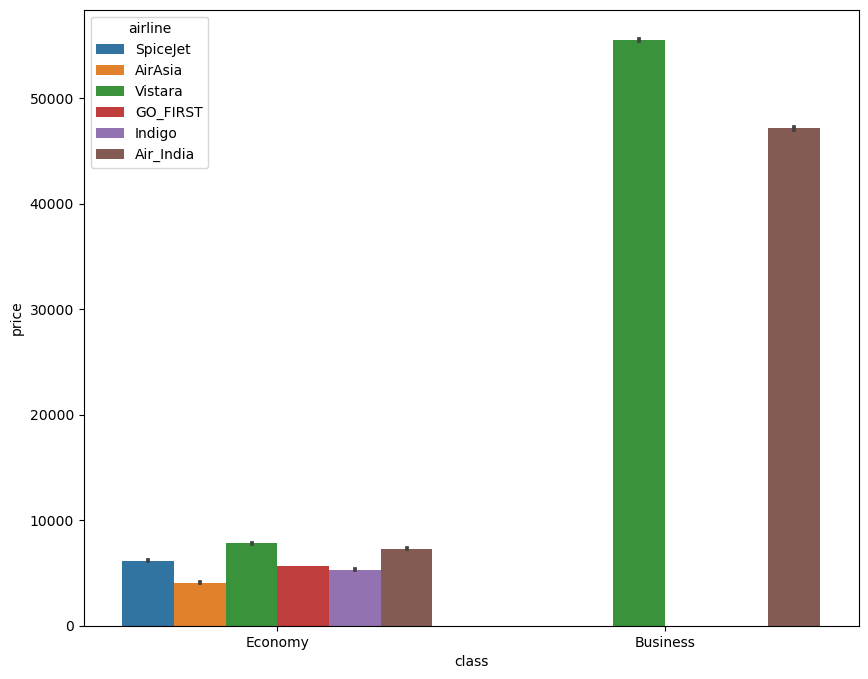

In [14]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'class', y = 'price', data = df, hue = 'airline')

### Range of price of all the flights of economy and business class.

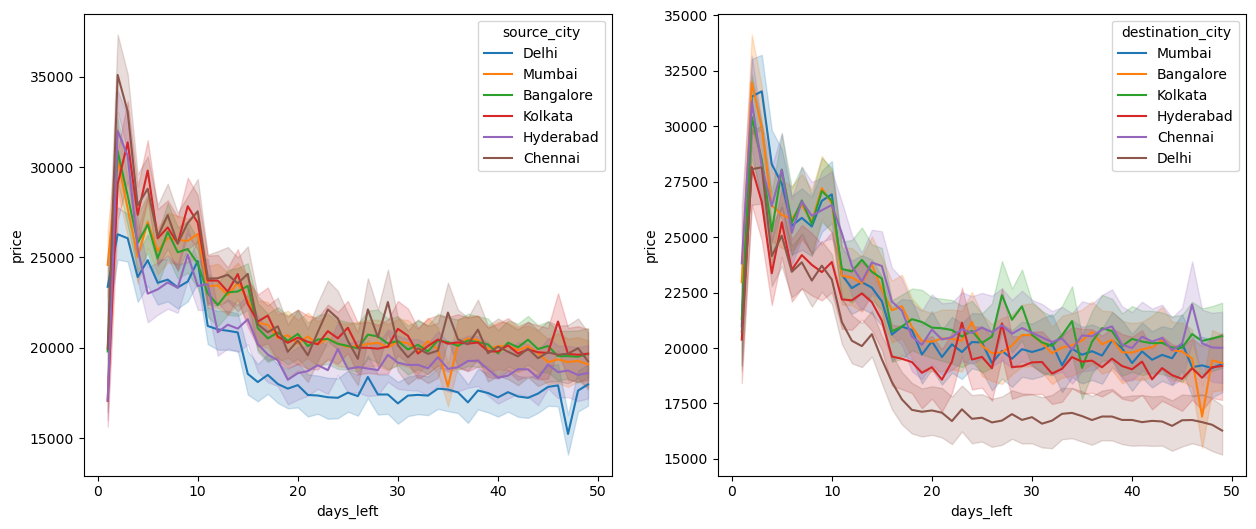

In [15]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
sns.lineplot(x = 'days_left', y = 'price', data = df, hue = 'source_city',  ax = ax[0])
sns.lineplot(x= 'days_left', y = 'price', data = df, hue = 'destination_city', ax = ax[1])
plt.show()

### Range of price of flights with source and destination city according to days left

## Visualizations of categorical features with countplot

Text(0.5, 1.0, 'Frequency of class')

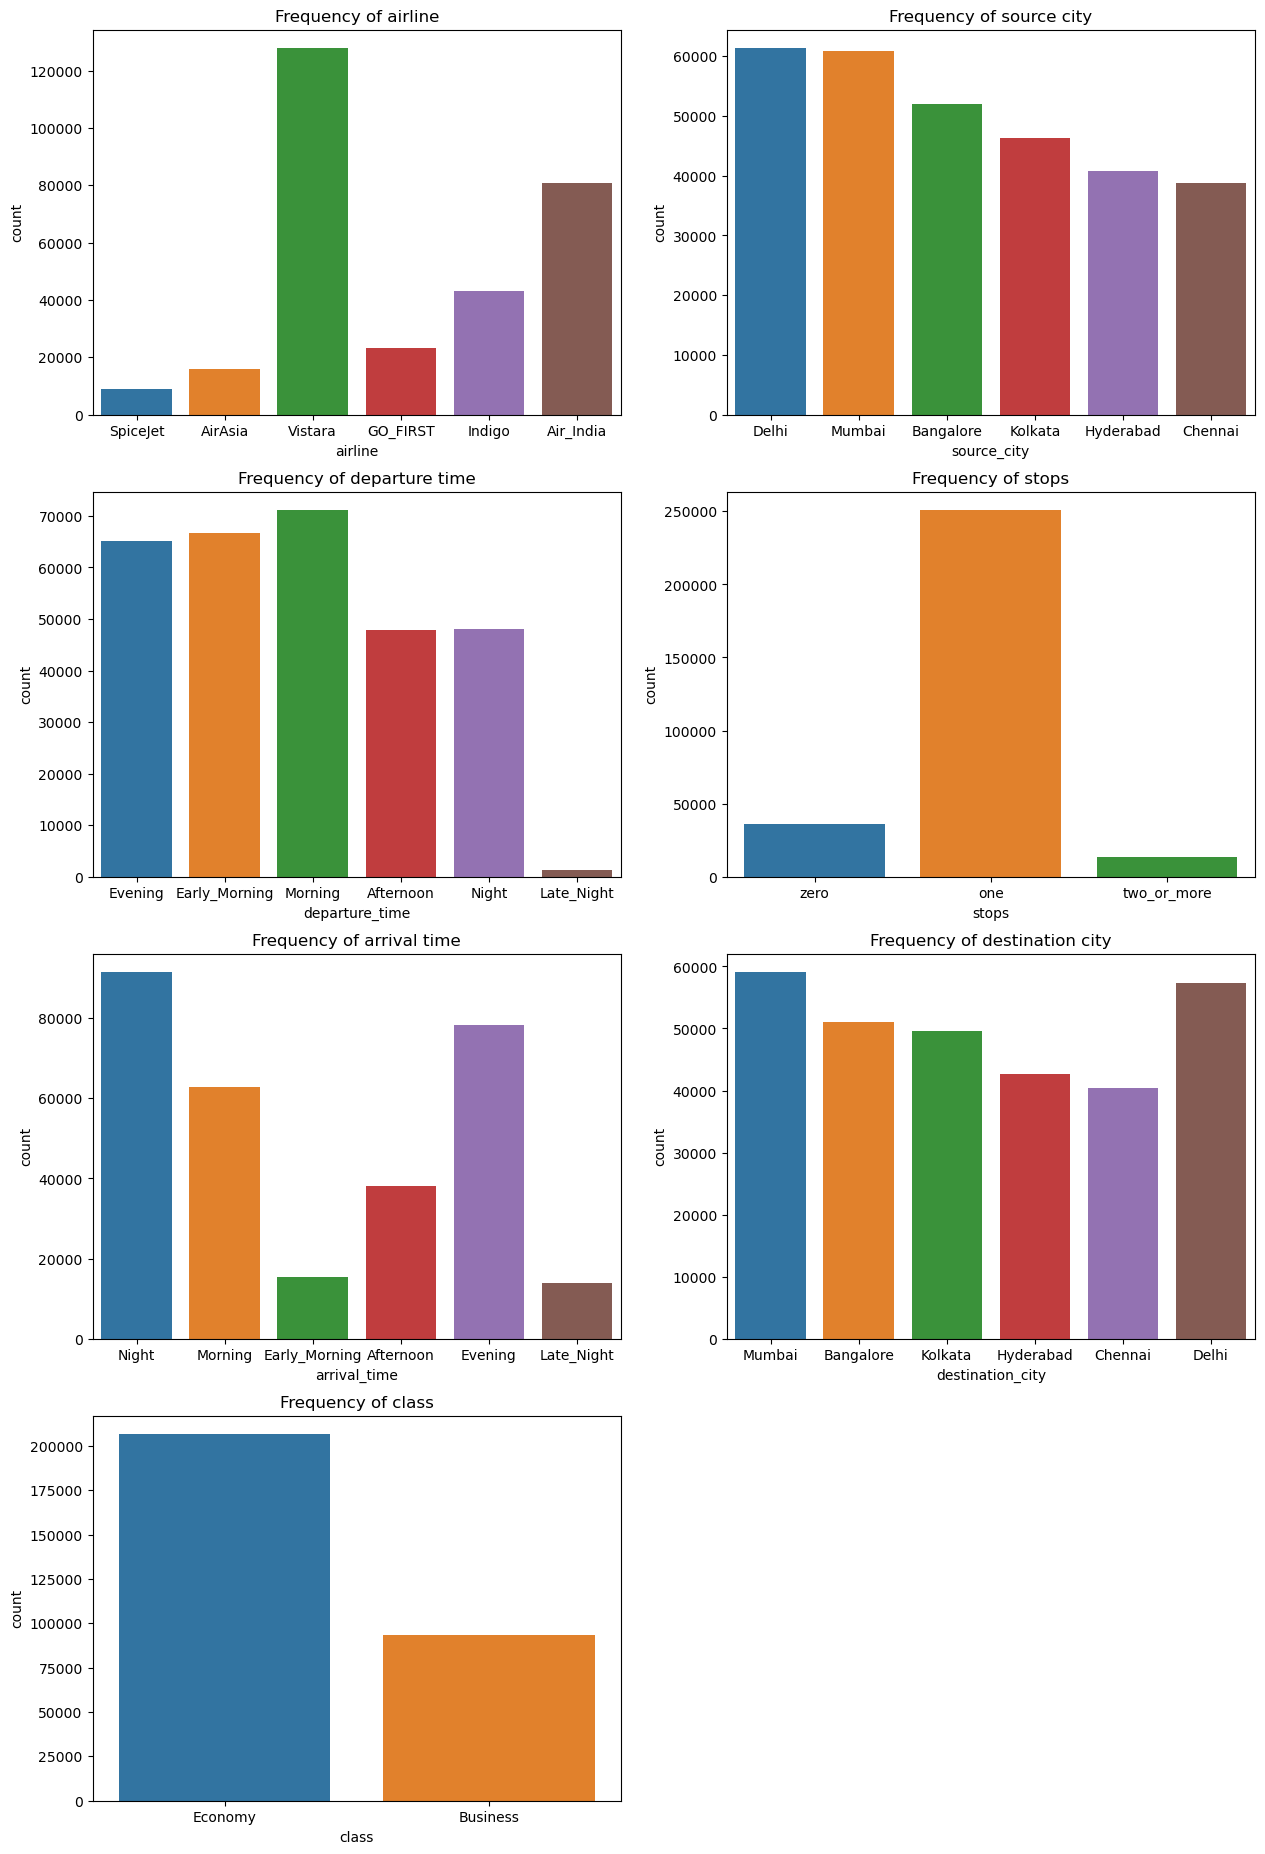

In [16]:
plt.figure(figsize = (15,23))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'], data = df)
plt.title("Frequency of airline")

plt.subplot(4,2,2)
sns.countplot(x = df['source_city'], data = df)
plt.title("Frequency of source city")

plt.subplot(4,2,3)
sns.countplot(x = df['departure_time'], data = df)
plt.title("Frequency of departure time")

plt.subplot(4,2,4)
sns.countplot(x = df['stops'], data = df)
plt.title("Frequency of stops")

plt.subplot(4,2,5)
sns.countplot(x= df['arrival_time'], data = df)
plt.title("Frequency of arrival time")

plt.subplot(4,2,6)
sns.countplot(x = df['destination_city'], data = df)
plt.title("Frequency of destination city")

plt.subplot(4,2,7)
sns.countplot(x = df['class'], data = df)
plt.title("Frequency of class")

# Label Encoding:

### Performing one hot encoding for categorical features of a dataframe.

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


# Feature selection

#### Plotting the correlation to see the correlation between feature and dependent variable

C:\Users\shafi\AppData\Local\Temp\ipykernel_24580\2620137554.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


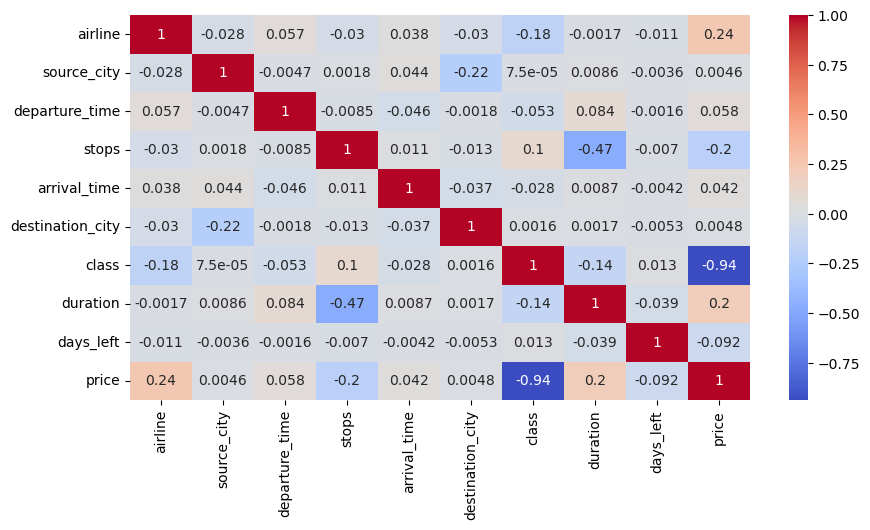

In [20]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

#### Selecting the features using VIF. VIF should be less than be 5. so drop the stops feature.

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)
        
X = df[col_list]        
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                   for i in range (len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


# Linear Regression:

### Applying standardization and implementing Linear regression model to predict the price of flight.

In [41]:
# Assuming 'df' is your DataFrame
# Identify categorical columns (you can adjust this list as needed)
categorical_columns = ['airline']

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Drop non-numeric columns that are not needed for the model
df_encoded = df_encoded.drop(columns=["flight"])

# Now you can proceed with the rest of your code, including standardization and modeling


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming 'df' is your DataFrame
# Identify and drop the 'Flight Plane's flight code' column
df = df.drop(["flight"], axis=1)

# Now, you can proceed with the standardization code

x = df.drop(columns = ['price'])
y = df['price']
X_train, X_test,y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
difference = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Actual_value', 'Predicted_value'])
difference

,Actual_value,Predicted_value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [47]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

In [48]:
r2_score(y_test, y_pred)
mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
mean_absolute_error

4624.994868016678

In [49]:
mean_absolute_percentage_error(y_test, y_pred)
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred)
MAPE

0.43535810896828725

In [51]:
MSE = metrics.mean_squared_error(y_test, y_pred)
MSE

49200540.29372201

In [50]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE

7014.309680483319

C:\Users\shafi\AppData\Local\Temp\ipykernel_24580\3844077171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = 'Actual')
C:\Users\shafi\AppData\Local\Temp\ipykernel_24580\3844077171.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'Predicted')


<function matplotlib.pyplot.legend(*args, **kwargs)>

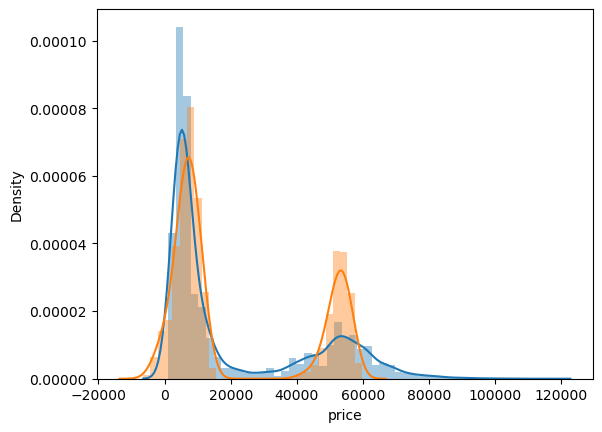

In [52]:
# Plotting the graph of actual and predicted price of flight

sns.distplot(y_test, label = 'Actual')
sns.distplot(y_pred, label = 'Predicted')
plt.legend

In [56]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

In [57]:
r2_score(y_test, y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)
MAE

1174.151852098638

In [58]:
mean_absolute_percentage_error(y_test, y_pred)
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred)
MAPE

0.07391329167391548

In [61]:
MSE = metrics.mean_squared_error(y_test, y_pred)
MSE

12582620.42266912

In [59]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

3549.515759033654

C:\Users\shafi\AppData\Local\Temp\ipykernel_24580\3844077171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = 'Actual')
C:\Users\shafi\AppData\Local\Temp\ipykernel_24580\3844077171.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'Predicted')


<function matplotlib.pyplot.legend(*args, **kwargs)>

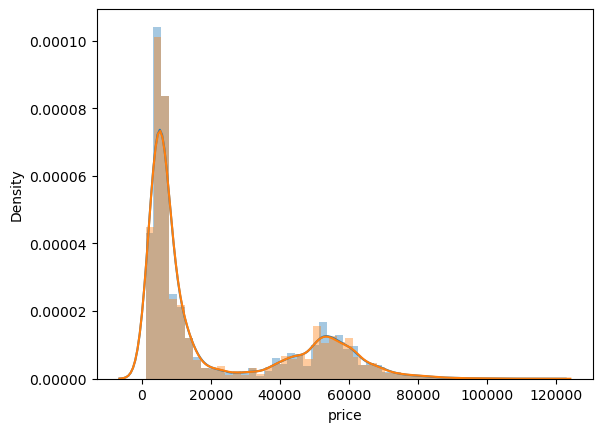

In [62]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_pred, label = 'Predicted')
plt.legend

# Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)

In [65]:
r2_score(y_test, y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)
MAE

1089.2168841128212

In [66]:
mean_absolute_percentage_error(y_test, y_pred)
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred)
MAPE

0.07038037264554395

In [67]:
MSE = metrics.mean_squared_error(y_test, y_pred)
MSE

7740815.362953829

In [68]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE

2782.2320828704833

C:\Users\shafi\AppData\Local\Temp\ipykernel_24580\3844077171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = 'Actual')
C:\Users\shafi\AppData\Local\Temp\ipykernel_24580\3844077171.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'Predicted')


<function matplotlib.pyplot.legend(*args, **kwargs)>

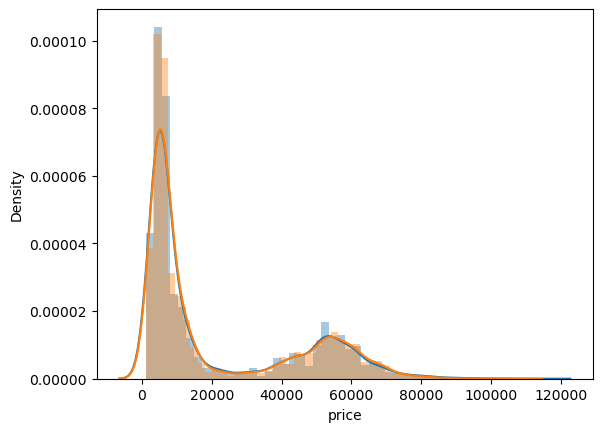

In [69]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(y_pred, label = 'Predicted')
plt.legend